In [59]:
import pandas as pd
import numpy as np

#import data visualization libraries
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.plotly as py
import plotly.graph_objs as go
# For offline use
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
# For offline use
cf.go_offline()

# For Notebooks
init_notebook_mode(connected=True)




# Dataset Dictionary

5. Exits - "salidas"
9. Avg..Order.Value - carritoMedio
10. Buy.to.Detail.Rate - Number of products purchased per number of product-detail views <- BDR
11. Cart.to.Detail.Rate - (number of products added per number of product-detail views) <-"CDR"
12. Ecommerce.Conversion.Rate <-"CR"
13. Product.Adds.To.Cart <-"PAC"
14. Per.Session.Value <-"valorSesion"
15. Product.Removes.From.Cart <-"PRC"
16. Transactions <-"transacciones"
17. Refunds <-"devoluciones"
18. Product.List.Clicks <-"PLC"
19. Product.Checkouts <-"checkouts"
20. Revenue <-"ingresos"
21. Clicks <-"clicks"
22. Cost.per.Conversion <-"CPA"
23. ROAS <- Revenue of marketing investment

In [60]:
#Lets set to show max columns in dataset
pd.options.display.max_columns=30

df=pd.read_csv('AnalyticsSunpers.csv')
df.head()

Date  Organic Searches Avg. Session Duration Bounces  Exits New Users  \
0  20170528               396               0:01:24   2,009  3,035     2,136   
1  20170529               375               0:01:30   2,319  3,471     2,443   
2  20170525               315               0:01:21   2,615  3,794     2,541   
3  20170530               300               0:01:36   1,759  2,737     1,792   
4  20170815               285               0:02:02   1,592  2,608     1,728   

  Sessions Pageviews Avg. Order Value Buy-to-Detail Rate Cart-to-Detail Rate  \
0    3,035     7,456           €59.35              1.67%               8.79%   
1    3,471     8,668           €51.45              2.08%               8.87%   
2    3,794     9,295           €42.69              1.50%               9.54%   
3    2,737     7,290           €50.00              1.47%               8.33%   
4    2,608     8,536           €49.74              4.48%              20.05%   

  Ecommerce Conversion Rate  Product Adds To Cart Per Session Value  \
0                     0.79%                   189             €0.47   
1                     1.09%                   209             €0.56   
2                     1.05%                   279             €0.45   
3                     1.10%                   209             €0.55   
4                     2.38%                   550             €1.18   

   Product Removes From Cart  Transactions  Refunds Product List CTR  \
0                         63            24        0            0.45%   
1                         26            38        0            0.42%   
2                         23            40        0            0.56%   
3                         15            30        0            0.37%   
4                         40            62        0            0.43%   

   Product List Clicks  Product Checkouts    Revenue Clicks  \
0                  328                 94  €1,424.33  2,144   
1                  295                178  €1,955.27  2,764   
2                  452                182  €1,707.73  1,931   
3                  300                101  €1,499.97  2,821   
4                  300                351  €3,084.16  1,250   

  Cost per Conversion     ROAS    CPC    CTR  
0              €18.44  321.86%  €0.21  0.21%  
1              €15.75  326.69%  €0.22  0.18%  
2              €11.02  387.39%  €0.23  0.21%  
3              €21.30  234.70%  €0.23  0.19%  
4               €5.42  918.45%  €0.27  0.27%

In [61]:
df.columns

Index(['Date', 'Organic Searches', 'Avg. Session Duration', 'Bounces', 'Exits',
       'New Users', 'Sessions', 'Pageviews', 'Avg. Order Value',
       'Buy-to-Detail Rate', 'Cart-to-Detail Rate',
       'Ecommerce Conversion Rate', 'Product Adds To Cart',
       'Per Session Value', 'Product Removes From Cart', 'Transactions',
       'Refunds', 'Product List CTR', 'Product List Clicks',
       'Product Checkouts', 'Revenue', 'Clicks', 'Cost per Conversion', 'ROAS',
       'CPC', 'CTR'],
      dtype='object')

# Cleaning data 

In [62]:
df['Avg. Order Value'] = df['Avg. Order Value'].str.replace('€','')
df['Revenue'] = df['Revenue'].str.replace('€','')
df['CPC'] = df['CPC'].str.replace('€','')
df['Cost per Conversion'] = df['Cost per Conversion'].str.replace('€','')
df['Per Session Value'] = df['Per Session Value'].str.replace('€','')

df['Buy-to-Detail Rate'] =df['Buy-to-Detail Rate'].str.replace('%','')
df['ROAS'] =df['ROAS'].str.replace('%','')
df['Product List CTR'] =df['Product List CTR'].str.replace('%','')
df['Cart-to-Detail Rate'] =df['Cart-to-Detail Rate'].str.replace('%','')
df['Ecommerce Conversion Rate'] =df['Ecommerce Conversion Rate'].str.replace('%','')

df['CTR'] =df['CTR'].str.replace('%','')
df['Exits'] =df['Exits'].str.replace(',','')
df['Bounces'] =df['Bounces'].str.replace(',','')
df['New Users'] =df['New Users'].str.replace(',','')
df['Pageviews'] =df['Pageviews'].str.replace(',','')
df['Sessions'] =df['Sessions'].str.replace(',','')
df['Clicks'] =df['Clicks'].str.replace(',','')
df['Revenue'] =df['Revenue'].str.replace(',','')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 26 columns):
Date                         178 non-null int64
Organic Searches             178 non-null int64
Avg. Session Duration        178 non-null object
Bounces                      178 non-null object
Exits                        178 non-null object
New Users                    178 non-null object
Sessions                     178 non-null object
Pageviews                    178 non-null object
Avg. Order Value             178 non-null object
Buy-to-Detail Rate           178 non-null object
Cart-to-Detail Rate          178 non-null object
Ecommerce Conversion Rate    178 non-null object
Product Adds To Cart         178 non-null int64
Per Session Value            178 non-null object
Product Removes From Cart    178 non-null int64
Transactions                 178 non-null int64
Refunds                      178 non-null int64
Product List CTR             178 non-null object
Product List Clicks

In [64]:
#CONVERTING MIN INTO SECONDS FUCNTIONS

def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [65]:
df['Avg. Session Duration']=df['Avg. Session Duration'].apply(get_sec)

In [66]:
#Renaming columns
df.rename(columns={'Cart-to-Detail Rate': 'CDR'}, inplace=True)
df.rename(columns={'Buy-to-Detail Rate': 'BDR'}, inplace=True)
df.rename(columns={'Cost per Conversion': 'CPA'}, inplace=True)
df.rename(columns={'Product Removes From Cart': 'PRC'}, inplace=True)
df.rename(columns={'Product List Clicks': 'PLC'}, inplace=True)
df.rename(columns={'Product Checkouts': 'Checkouts'}, inplace=True)
df.rename(columns={'Ecommerce Conversion Rate': 'CR'}, inplace=True)



In [67]:
#Delete empty column
df.drop('Refunds', axis=1, inplace=True)

In [68]:
dfc=df
dfc.to_csv('SunpersCleanedData.csv', encoding='utf-8', index=False)
dfc.to_excel('SunpersCleanedData.xlsx', encoding='utf-8', index=False)

In [69]:
#Lets visualize non-normilized yet data
dfc.iplot(kind='box')

In [70]:
dfc.head()

Date  Organic Searches  Avg. Session Duration Bounces Exits New Users  \
0  20170528               396                     84    2009  3035      2136   
1  20170529               375                     90    2319  3471      2443   
2  20170525               315                     81    2615  3794      2541   
3  20170530               300                     96    1759  2737      1792   
4  20170815               285                    122    1592  2608      1728   

  Sessions Pageviews Avg. Order Value   BDR    CDR    CR  \
0     3035      7456            59.35  1.67   8.79  0.79   
1     3471      8668            51.45  2.08   8.87  1.09   
2     3794      9295            42.69  1.50   9.54  1.05   
3     2737      7290            50.00  1.47   8.33  1.10   
4     2608      8536            49.74  4.48  20.05  2.38   

   Product Adds To Cart Per Session Value  PRC  Transactions Product List CTR  \
0                   189              0.47   63            24             0.45   
1                   209              0.56   26            38             0.42   
2                   279              0.45   23            40             0.56   
3                   209              0.55   15            30             0.37   
4                   550              1.18   40            62             0.43   

   PLC  Checkouts  Revenue Clicks    CPA    ROAS   CPC   CTR  
0  328         94  1424.33   2144  18.44  321.86  0.21  0.21  
1  295        178  1955.27   2764  15.75  326.69  0.22  0.18  
2  452        182  1707.73   1931  11.02  387.39  0.23  0.21  
3  300        101  1499.97   2821  21.30  234.70  0.23  0.19  
4  300        351  3084.16   1250   5.42  918.45  0.27  0.27

# Data Normalization

In [71]:
#SKIP IT AND DO RIGHT DURING THE MODELING PROCESS
#or
print('https://web.archive.org/web/20160520170701/http://chrisalbon.com:80/python/pandas_normalize_column.html')

https://web.archive.org/web/20160520170701/http://chrisalbon.com:80/python/pandas_normalize_column.html


In [72]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 25 columns):
Date                     178 non-null int64
Organic Searches         178 non-null int64
Avg. Session Duration    178 non-null int64
Bounces                  178 non-null object
Exits                    178 non-null object
New Users                178 non-null object
Sessions                 178 non-null object
Pageviews                178 non-null object
Avg. Order Value         178 non-null object
BDR                      178 non-null object
CDR                      178 non-null object
CR                       178 non-null object
Product Adds To Cart     178 non-null int64
Per Session Value        178 non-null object
PRC                      178 non-null int64
Transactions             178 non-null int64
Product List CTR         178 non-null object
PLC                      178 non-null int64
Checkouts                178 non-null int64
Revenue                  178 non-null object
Cli

In [73]:
from sklearn import preprocessing

In [74]:
# Create n, where n the 'dataset'values as floats
n = dfc.values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
n_scaled = min_max_scaler.fit_transform(n)

# Run the normalizer on the dataframe
dfn = pd.DataFrame(n_scaled)

In [75]:
#Lets change columns names

dfn.columns= ['Date', 'Organic Searches', 'Avg. Session Duration', 'Bounces', 'Exits',
       'New Users', 'Sessions', 'Pageviews', 'Avg. Order Value', 'BDR', 'CDR',
       'Ecommerce Conversion Rate', 'Product Adds To Cart',
       'Per Session Value', 'Product Removes From Cart', 'Transactions',
       'Product List CTR', 'Product List Clicks', 'Product Checkouts',
       'Revenue', 'Clicks', 'CPA', 'ROAS', 'CPC', 'CTR']

# Data Exploration

In [76]:
dfn.head()

Date  Organic Searches  Avg. Session Duration   Bounces     Exits  \
0  0.242366          1.000000               0.098592  0.463758  0.553751   
1  0.244275          0.946970               0.105634  0.535319  0.633327   
2  0.236641          0.795455               0.095070  0.603647  0.692280   
3  0.246183          0.757576               0.112676  0.406048  0.499361   
4  0.790076          0.719697               0.143192  0.367498  0.475817   

   New Users  Sessions  Pageviews  Avg. Order Value       BDR     CDR  \
0   0.497090  0.553650   0.701789          0.867056  0.150315  0.0879   
1   0.568568  0.633212   0.815913          0.751644  0.187219  0.0887   
2   0.591385  0.692153   0.874953          0.623667  0.135014  0.0954   
3   0.416997  0.499270   0.686158          0.730460  0.132313  0.0833   
4   0.402095  0.475730   0.803484          0.726662  0.403240  0.2005   

   Ecommerce Conversion Rate  Product Adds To Cart  Per Session Value  \
0                   0.071107              0.223669           0.085299   
1                   0.098110              0.247337           0.101633   
2                   0.094509              0.330178           0.081670   
3                   0.099010              0.247337           0.099819   
4                   0.214221              0.650888           0.214156   

   Product Removes From Cart  Transactions  Product List CTR  \
0                   1.000000      0.226415          0.152027   
1                   0.412698      0.358491          0.141892   
2                   0.365079      0.377358          0.189189   
3                   0.238095      0.283019          0.125000   
4                   0.634921      0.584906          0.145270   

   Product List Clicks  Product Checkouts   Revenue    Clicks       CPA  \
0             0.419974           0.266289  0.270024  0.320958  0.049992   
1             0.377721           0.504249  0.370679  0.413772  0.042699   
2             0.578745           0.515581  0.323751  0.289072  0.029876   
3             0.384123           0.286119  0.284364  0.422305  0.057745   
4             0.384123           0.994334  0.584694  0.187126  0.014694   

       ROAS       CPC      CTR  
0  0.001416  0.477273  0.00252  
1  0.001437  0.500000  0.00216  
2  0.001704  0.522727  0.00252  
3  0.001033  0.522727  0.00228  
4  0.004041  0.613636  0.00324

In [77]:
#Visualize and Check how difference normalization data to non-normalization data 
dfn.drop('Date', axis=1).iplot(kind='box')

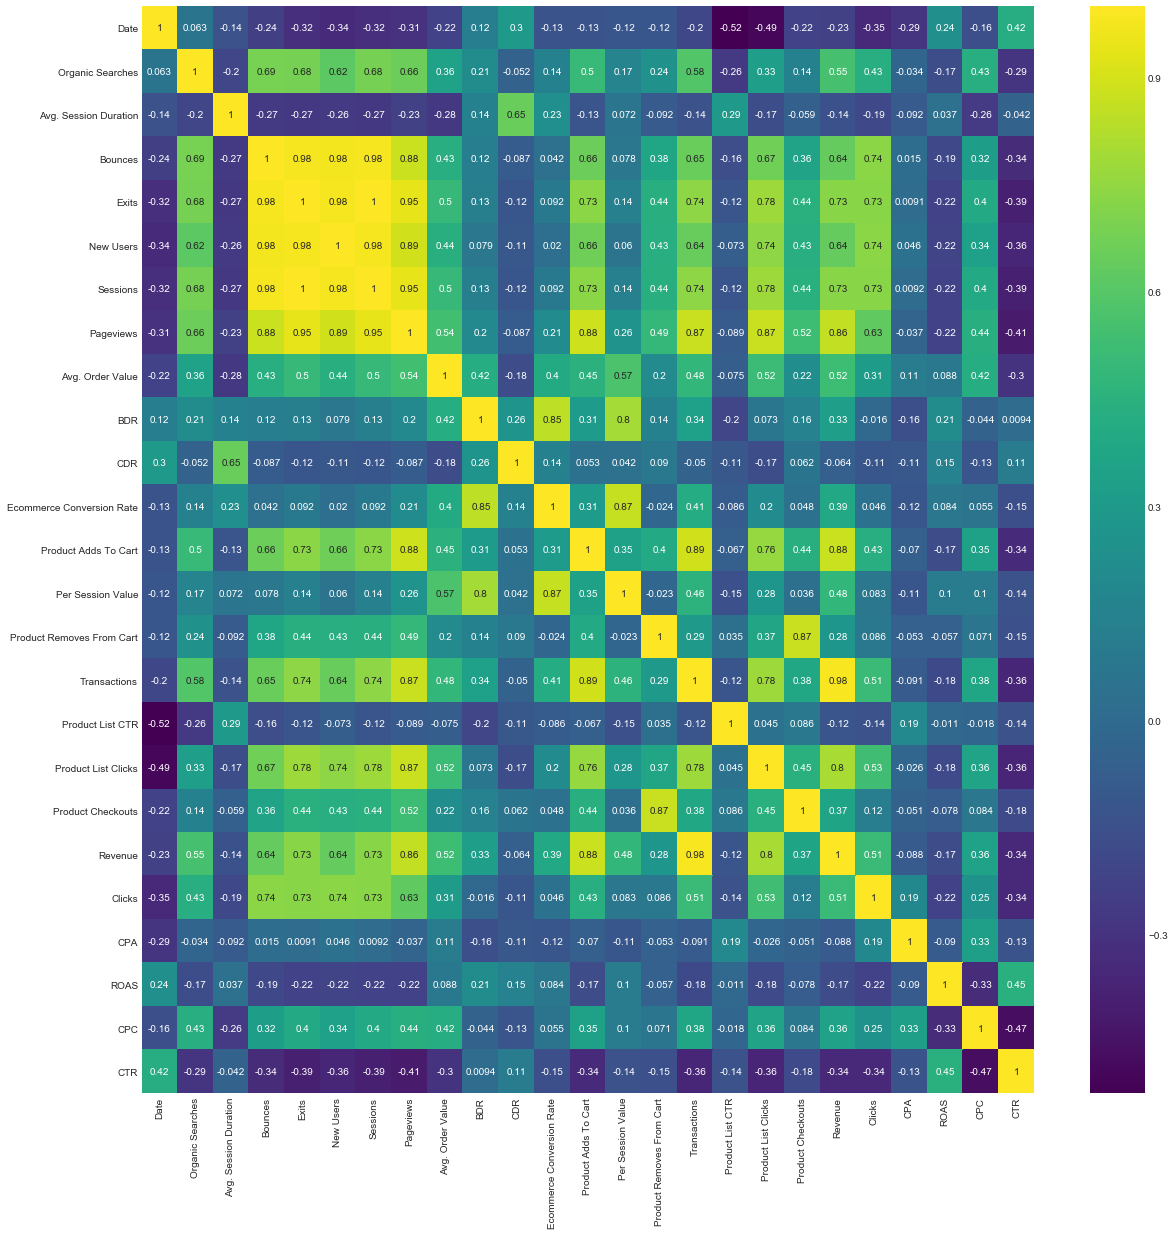

In [78]:
plt.figure(figsize=(20,20))
sns.heatmap(dfn.corr(), cmap='viridis', annot=True)

Text(0.5,0,'Avg. Order Value')

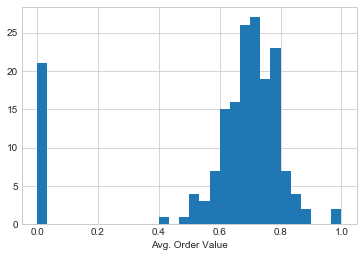

In [79]:
#Cruzamos todas las variables al respeto de cesta media
sns.set_style('whitegrid')
dfn['Avg. Order Value'].hist(bins=30)
plt.xlabel('Avg. Order Value')

Text(0.5,0,'Bounces')

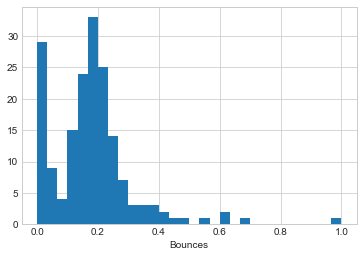

In [80]:
#Cruzamos todas las variables al respeto de rebotes
sns.set_style('whitegrid')
dfn['Bounces'].hist(bins=30)
plt.xlabel('Bounces')

In [81]:
dfn.head()

Date  Organic Searches  Avg. Session Duration   Bounces     Exits  \
0  0.242366          1.000000               0.098592  0.463758  0.553751   
1  0.244275          0.946970               0.105634  0.535319  0.633327   
2  0.236641          0.795455               0.095070  0.603647  0.692280   
3  0.246183          0.757576               0.112676  0.406048  0.499361   
4  0.790076          0.719697               0.143192  0.367498  0.475817   

   New Users  Sessions  Pageviews  Avg. Order Value       BDR     CDR  \
0   0.497090  0.553650   0.701789          0.867056  0.150315  0.0879   
1   0.568568  0.633212   0.815913          0.751644  0.187219  0.0887   
2   0.591385  0.692153   0.874953          0.623667  0.135014  0.0954   
3   0.416997  0.499270   0.686158          0.730460  0.132313  0.0833   
4   0.402095  0.475730   0.803484          0.726662  0.403240  0.2005   

   Ecommerce Conversion Rate  Product Adds To Cart  Per Session Value  \
0                   0.071107              0.223669           0.085299   
1                   0.098110              0.247337           0.101633   
2                   0.094509              0.330178           0.081670   
3                   0.099010              0.247337           0.099819   
4                   0.214221              0.650888           0.214156   

   Product Removes From Cart  Transactions  Product List CTR  \
0                   1.000000      0.226415          0.152027   
1                   0.412698      0.358491          0.141892   
2                   0.365079      0.377358          0.189189   
3                   0.238095      0.283019          0.125000   
4                   0.634921      0.584906          0.145270   

   Product List Clicks  Product Checkouts   Revenue    Clicks       CPA  \
0             0.419974           0.266289  0.270024  0.320958  0.049992   
1             0.377721           0.504249  0.370679  0.413772  0.042699   
2             0.578745           0.515581  0.323751  0.289072  0.029876   
3             0.384123           0.286119  0.284364  0.422305  0.057745   
4             0.384123           0.994334  0.584694  0.187126  0.014694   

       ROAS       CPC      CTR  
0  0.001416  0.477273  0.00252  
1  0.001437  0.500000  0.00216  
2  0.001704  0.522727  0.00252  
3  0.001033  0.522727  0.00228  
4  0.004041  0.613636  0.00324

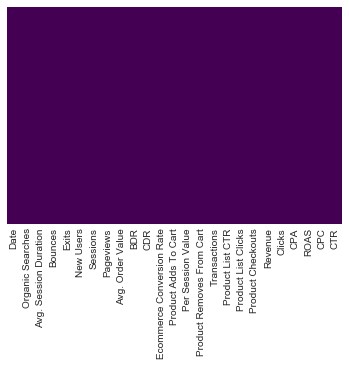

In [82]:
#Identificamos si hay algun valor nulo
sns.heatmap(dfn.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [83]:
dfn.head()

Date  Organic Searches  Avg. Session Duration   Bounces     Exits  \
0  0.242366          1.000000               0.098592  0.463758  0.553751   
1  0.244275          0.946970               0.105634  0.535319  0.633327   
2  0.236641          0.795455               0.095070  0.603647  0.692280   
3  0.246183          0.757576               0.112676  0.406048  0.499361   
4  0.790076          0.719697               0.143192  0.367498  0.475817   

   New Users  Sessions  Pageviews  Avg. Order Value       BDR     CDR  \
0   0.497090  0.553650   0.701789          0.867056  0.150315  0.0879   
1   0.568568  0.633212   0.815913          0.751644  0.187219  0.0887   
2   0.591385  0.692153   0.874953          0.623667  0.135014  0.0954   
3   0.416997  0.499270   0.686158          0.730460  0.132313  0.0833   
4   0.402095  0.475730   0.803484          0.726662  0.403240  0.2005   

   Ecommerce Conversion Rate  Product Adds To Cart  Per Session Value  \
0                   0.071107              0.223669           0.085299   
1                   0.098110              0.247337           0.101633   
2                   0.094509              0.330178           0.081670   
3                   0.099010              0.247337           0.099819   
4                   0.214221              0.650888           0.214156   

   Product Removes From Cart  Transactions  Product List CTR  \
0                   1.000000      0.226415          0.152027   
1                   0.412698      0.358491          0.141892   
2                   0.365079      0.377358          0.189189   
3                   0.238095      0.283019          0.125000   
4                   0.634921      0.584906          0.145270   

   Product List Clicks  Product Checkouts   Revenue    Clicks       CPA  \
0             0.419974           0.266289  0.270024  0.320958  0.049992   
1             0.377721           0.504249  0.370679  0.413772  0.042699   
2             0.578745           0.515581  0.323751  0.289072  0.029876   
3             0.384123           0.286119  0.284364  0.422305  0.057745   
4             0.384123           0.994334  0.584694  0.187126  0.014694   

       ROAS       CPC      CTR  
0  0.001416  0.477273  0.00252  
1  0.001437  0.500000  0.00216  
2  0.001704  0.522727  0.00252  
3  0.001033  0.522727  0.00228  
4  0.004041  0.613636  0.00324

In [84]:
dfc.head()

Date  Organic Searches  Avg. Session Duration Bounces Exits New Users  \
0  20170528               396                     84    2009  3035      2136   
1  20170529               375                     90    2319  3471      2443   
2  20170525               315                     81    2615  3794      2541   
3  20170530               300                     96    1759  2737      1792   
4  20170815               285                    122    1592  2608      1728   

  Sessions Pageviews Avg. Order Value   BDR    CDR    CR  \
0     3035      7456            59.35  1.67   8.79  0.79   
1     3471      8668            51.45  2.08   8.87  1.09   
2     3794      9295            42.69  1.50   9.54  1.05   
3     2737      7290            50.00  1.47   8.33  1.10   
4     2608      8536            49.74  4.48  20.05  2.38   

   Product Adds To Cart Per Session Value  PRC  Transactions Product List CTR  \
0                   189              0.47   63            24             0.45   
1                   209              0.56   26            38             0.42   
2                   279              0.45   23            40             0.56   
3                   209              0.55   15            30             0.37   
4                   550              1.18   40            62             0.43   

   PLC  Checkouts  Revenue Clicks    CPA    ROAS   CPC   CTR  
0  328         94  1424.33   2144  18.44  321.86  0.21  0.21  
1  295        178  1955.27   2764  15.75  326.69  0.22  0.18  
2  452        182  1707.73   1931  11.02  387.39  0.23  0.21  
3  300        101  1499.97   2821  21.30  234.70  0.23  0.19  
4  300        351  3084.16   1250   5.42  918.45  0.27  0.27

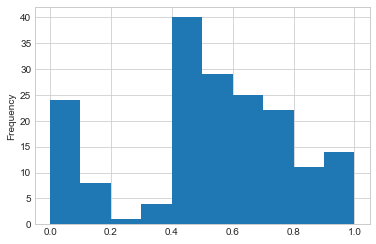

In [85]:
dfn['CPC'].plot(kind='hist', bins=10)

In [86]:
#Checking for standart deviation
#dfn.std()

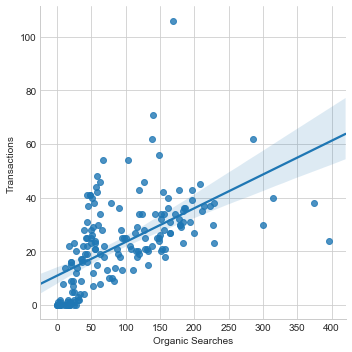

In [87]:
sns.lmplot(x='Organic Searches', y='Transactions',data=dfc)

In [88]:
dfc.describe()

Date  Organic Searches  Avg. Session Duration  \
count  1.780000e+02        178.000000             178.000000   
mean   2.017066e+07         91.938202             127.870787   
std    1.674064e+02         75.856627              92.986119   
min    2.017040e+07          0.000000               0.000000   
25%    2.017052e+07         30.250000             100.250000   
50%    2.017063e+07         66.000000             114.500000   
75%    2.017081e+07        148.000000             128.750000   
max    2.017092e+07        396.000000             852.000000   

       Product Adds To Cart         PRC  Transactions         PLC   Checkouts  
count            178.000000  178.000000    178.000000  178.000000  178.000000  
mean             181.241573    8.865169     22.511236  234.589888   62.106742  
std              133.991454   12.342285     16.333474  170.012812   78.904755  
min                0.000000    0.000000      0.000000    0.000000    0.000000  
25%              107.000000    0.000000     10.000000  100.000000    1.000000  
50%              182.000000    2.000000     22.000000  230.000000   13.000000  
75%              235.000000   16.000000     32.000000  329.000000  117.750000  
max              845.000000   63.000000    106.000000  781.000000  353.000000

# Modeling

## Training a linear regression model 

In [89]:
X = dfc.drop(['Transactions','Date'], axis=1)
y = dfc['Transactions']

In [90]:
# Lets split our dataset on training and test data, 75% to 25%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [91]:
# Creating and training model

from sklearn.linear_model import LinearRegression

In [92]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
# Model evaluation
# print the intercept
print(lm.intercept_)

1.119805606040618


In [94]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Organic Searches         -0.007451
Avg. Session Duration    -0.007036
Bounces                   0.004174
Exits                     0.619887
New Users                -0.004636
Sessions                 -0.622712
Pageviews                 0.003586
Avg. Order Value         -0.064849
BDR                      -0.966609
CDR                       0.034750
CR                        2.178520
Product Adds To Cart     -0.007204
Per Session Value        -1.489843
PRC                      -0.007244
Product List CTR          0.693280
PLC                      -0.016851
Checkouts                -0.000524
Revenue                   0.017460
Clicks                    0.000097
CPA                       0.001025
ROAS                      0.000010
CPC                       1.515192
CTR                      -0.005380

In [95]:
# Model Prediction
predictions = lm.predict(X_test)

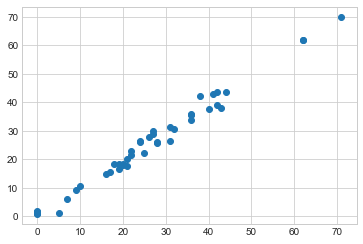

In [96]:
plt.scatter(y_test,predictions)

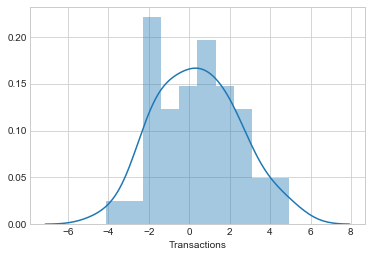

In [97]:
sns.distplot((y_test-predictions), bins = 10 );

In [98]:
#Regression Evaluation Metrics
#Here are three common evaluation metrics for regression problems:

In [99]:
from sklearn import metrics

In [100]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.6583456481547831
MSE: 4.1666973600628525
RMSE: 2.0412489706213823


# Modelin PCA


In [101]:
# PCA Visualization
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()
scaler.fit(dfc)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [103]:
scaled_data = scaler.transform(dfc)

In [104]:
from sklearn.decomposition import PCA

In [105]:
pca = PCA(n_components=2)

In [106]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [107]:
# Now we can transform this data to its first 2 principal components.

x_pca = pca.transform(scaled_data)

In [108]:
scaled_data.shape

(178, 25)

In [109]:
x_pca.shape

(178, 2)

Text(0,0.5,'Second Principal Component')

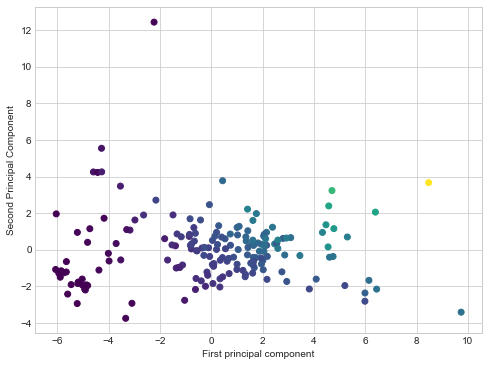

In [110]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=dfc['Transactions'],cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [111]:
pca.components_

array([[-0.10963789,  0.21233716, -0.07918893,  0.2800409 ,  0.29972995,
         0.283754  ,  0.29972558,  0.30981569,  0.19152173,  0.08271629,
        -0.03860413,  0.08791826,  0.26712479,  0.10722749,  0.14468765,
         0.27582245, -0.03297343,  0.26756846,  0.15542497,  0.27431902,
         0.21525636,  0.00596593, -0.07860897,  0.14951082, -0.14974309],
       [ 0.13542862,  0.00232863,  0.18204962, -0.11179618, -0.09826693,
        -0.13912497, -0.09827061, -0.02004423,  0.16060544,  0.48364113,
         0.21562818,  0.46896842,  0.09726318,  0.4543931 , -0.03768952,
         0.12835978, -0.12373134, -0.02739533, -0.01735494,  0.12900918,
        -0.13629039, -0.17456275,  0.19499431, -0.10022983,  0.08283694]])

In [112]:
# Interpreting the components

df_comp = pd.DataFrame(pca.components_,columns=dfc.columns)

In [113]:
df_comp

Date  Organic Searches  Avg. Session Duration   Bounces     Exits  \
0 -0.109638          0.212337              -0.079189  0.280041  0.299730   
1  0.135429          0.002329               0.182050 -0.111796 -0.098267   

   New Users  Sessions  Pageviews  Avg. Order Value       BDR       CDR  \
0   0.283754  0.299726   0.309816          0.191522  0.082716 -0.038604   
1  -0.139125 -0.098271  -0.020044          0.160605  0.483641  0.215628   

         CR  Product Adds To Cart  Per Session Value       PRC  Transactions  \
0  0.087918              0.267125           0.107227  0.144688      0.275822   
1  0.468968              0.097263           0.454393 -0.037690      0.128360   

   Product List CTR       PLC  Checkouts   Revenue    Clicks       CPA  \
0         -0.032973  0.267568   0.155425  0.274319  0.215256  0.005966   
1         -0.123731 -0.027395  -0.017355  0.129009 -0.136290 -0.174563   

       ROAS       CPC       CTR  
0 -0.078609  0.149511 -0.149743  
1  0.194994 -0.100230  0.082837

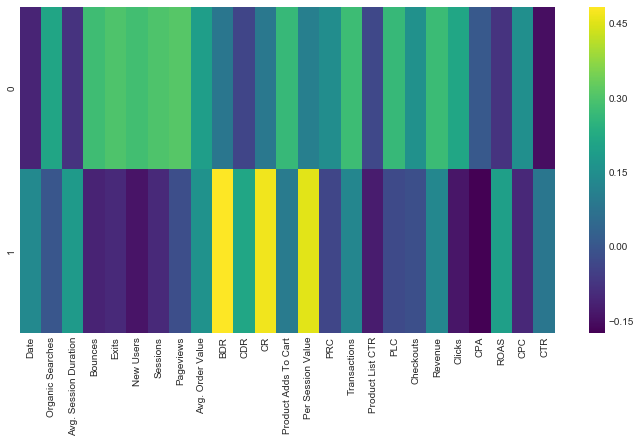

In [114]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='viridis',)